In [2]:
# Importing dataset from Kaggle

# !kaggle datasets download -d salaheddineelkhirani/5-year-data-for-s-and-p-500-and-nasdaq-100

In [3]:
# # Unzipping files to data folder
# import zipfile

# with zipfile.ZipFile("5-year-data-for-s-and-p-500-and-nasdaq-100.zip", "r") as zip_ref:
#  zip_ref.extractall("data")

In [4]:
# Import Libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
SP = pd.read_csv('data/S&P.csv')
print(SP.head())
print('--------------------------------------------------------------------')
NQ = pd.read_csv('data/NQ.csv')
print(NQ.head())

              Time     Open     High      Low    Close  Volume
0  8/11/2019 18:05  3201.50  3209.25  3201.50  3207.75    3407
1  8/11/2019 18:10  3207.50  3208.50  3206.75  3207.50     821
2  8/11/2019 18:15  3207.50  3208.00  3205.50  3206.00     589
3  8/11/2019 18:20  3205.75  3206.00  3204.75  3205.00     329
4  8/11/2019 18:25  3205.00  3206.00  3203.25  3204.25    1025
--------------------------------------------------------------------
              Time     Open     High      Low    Close  Volume
0  8/11/2019 23:05  9073.25  9098.50  9073.00  9092.50    1758
1  8/11/2019 23:10  9093.25  9095.50  9089.75  9092.75     438
2  8/11/2019 23:15  9093.00  9096.25  9088.00  9089.75     590
3  8/11/2019 23:20  9090.25  9090.25  9086.00  9087.00     278
4  8/11/2019 23:25  9086.75  9088.25  9079.75  9083.75     711


In [6]:
SP.info()
NQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353206 entries, 0 to 353205
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    353206 non-null  object 
 1   Open    353206 non-null  float64
 2   High    353206 non-null  float64
 3   Low     353206 non-null  float64
 4   Close   353206 non-null  float64
 5   Volume  353206 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 16.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329458 entries, 0 to 329457
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    329458 non-null  object 
 1   Open    329458 non-null  float64
 2   High    329458 non-null  float64
 3   Low     329458 non-null  float64
 4   Close   329458 non-null  float64
 5   Volume  329458 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 15.1+ MB


In [16]:
print(SP.isnull().sum())
print('--------------------------------------------------')
print(NQ.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
--------------------------------------------------
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [7]:
# Converting time, object column, to datetime
SP['Time'] = pd.to_datetime(SP['Time'])
NQ['Time'] = pd.to_datetime(NQ['Time']) 

In [8]:
SP = SP.set_index('Time')
NQ = NQ.set_index('Time')


In [9]:
SP.head()
NQ.head()

,Open,High,Low,Close,Volume
Time,,,,,
2019-08-11 23:05:00,9073.25,9098.50,9073.00,9092.50,1758
2019-08-11 23:10:00,9093.25,9095.50,9089.75,9092.75,438
2019-08-11 23:15:00,9093.00,9096.25,9088.00,9089.75,590
2019-08-11 23:20:00,9090.25,9090.25,9086.00,9087.00,278
2019-08-11 23:25:00,9086.75,9088.25,9079.75,9083.75,711


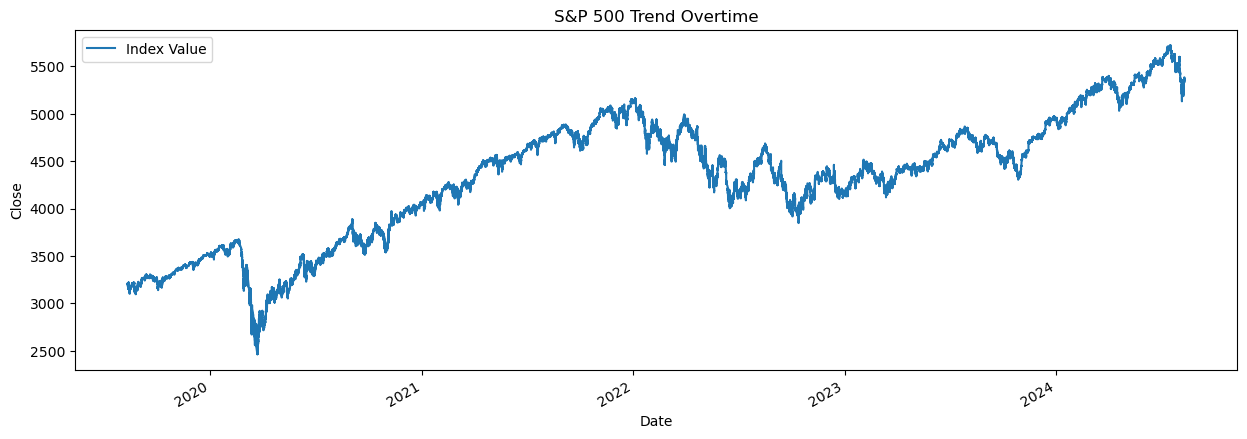

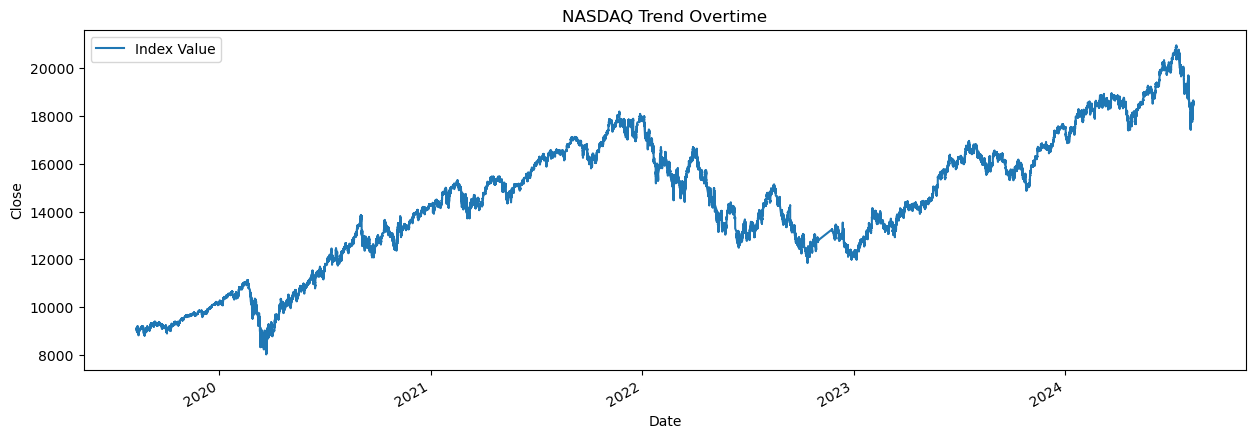

In [10]:
def plotting_close(df, title):
    plt.figure(figsize=(15,5))
    df['Close'].plot(label='Index Value')
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.title(title)
    plt.legend()
    plt.show()
plotting_close(SP, 'S&P 500 Trend Overtime')
plotting_close(NQ, 'NASDAQ Trend Overtime')
    

In [38]:
# Plotting moving average yearly of S&P 500 AND NASDAQ

def moving_average(df, title, palette, window):
    # Calculate the moving average
    moving_avg = df['Close'].rolling(
        window=window,
        center=True,
        min_periods=window // 2,
    ).mean()
    
    sns.set_palette(sns.color_palette(palette))

    plt.figure(figsize=(15, 6))
    
    plt.plot(df.index, df['Close'], '.', label='Close')
    
    plt.plot(df.index, moving_avg, linewidth=3, label='Moving Average')
    
    plt.xlabel('Date')
    plt.ylabel('Close')
    plt.title(title)
    plt.legend()
    plt.show()


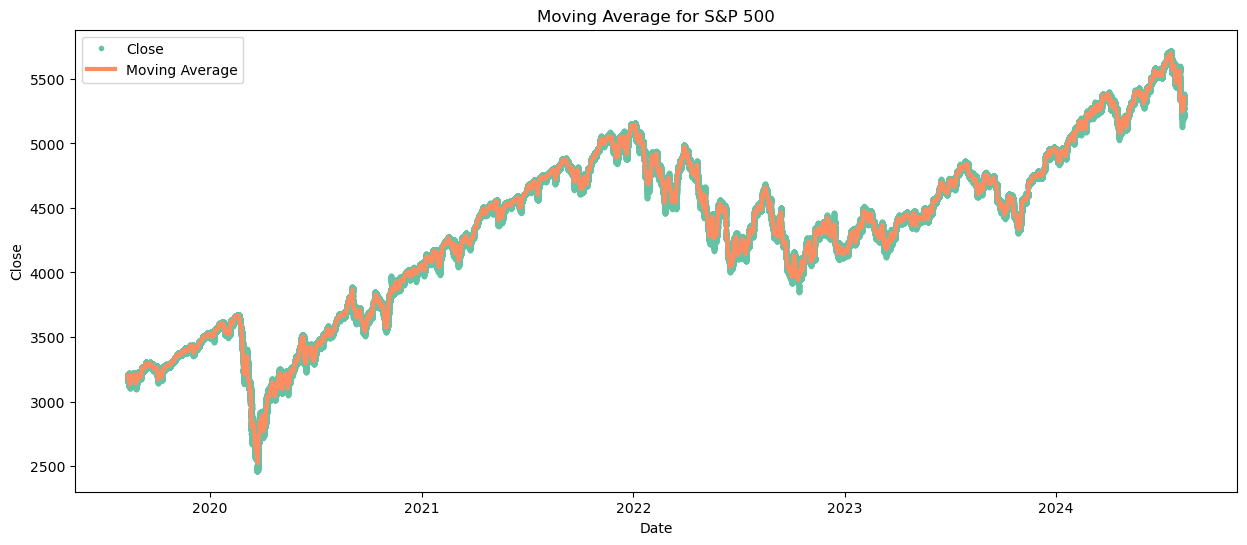

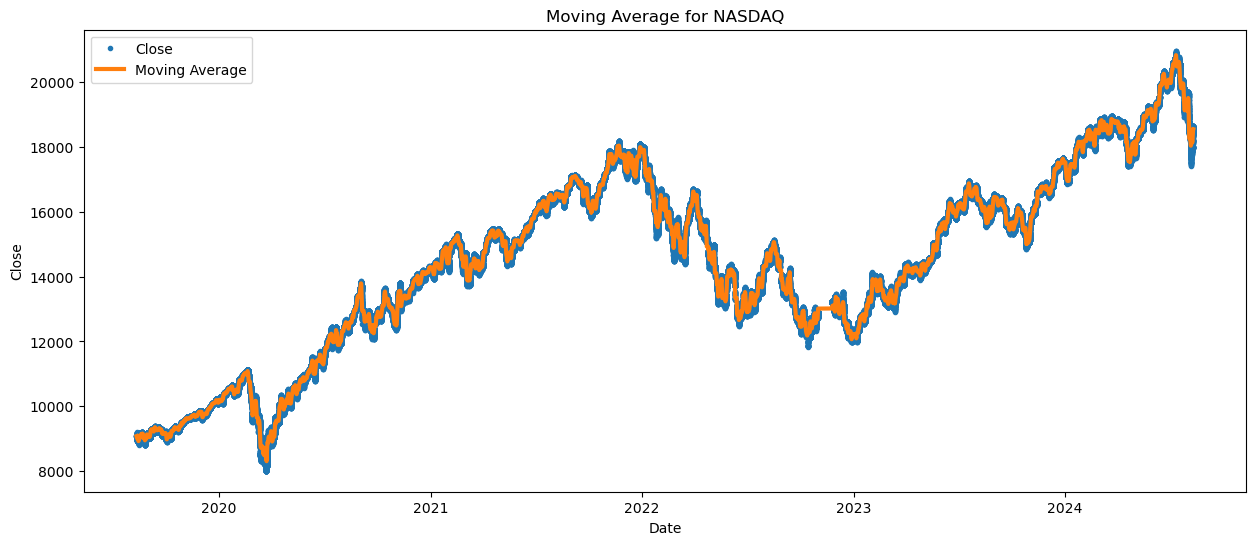

In [40]:
# YTD moving average

moving_average(SP, 'Moving Average for S&P 500', "Set2", 365)
moving_average(NQ, 'Moving Average for NASDAQ', "tab10", 365)


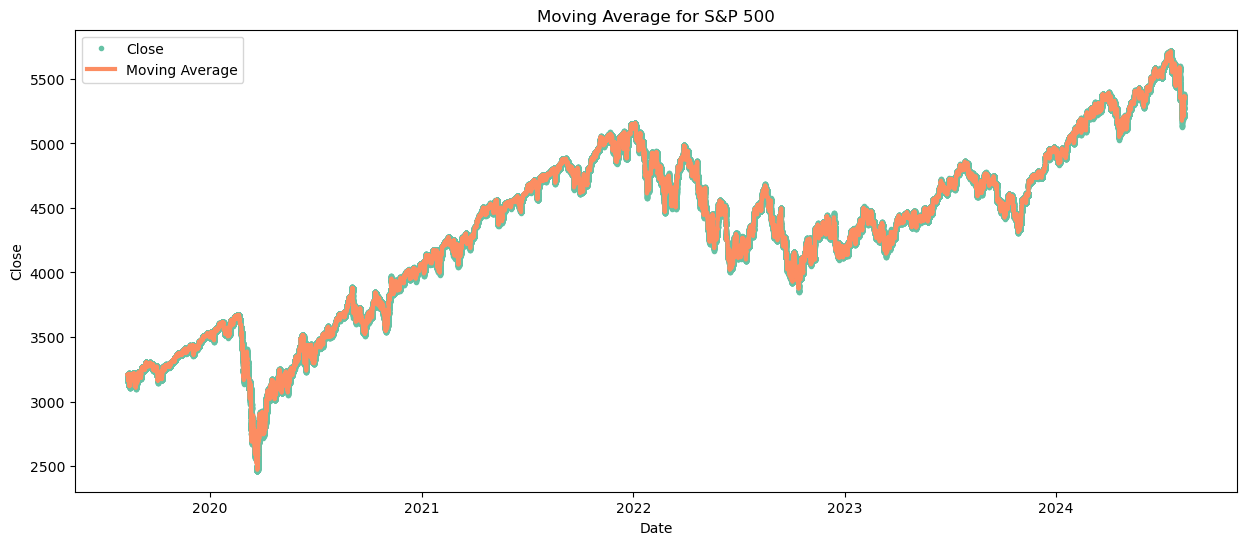

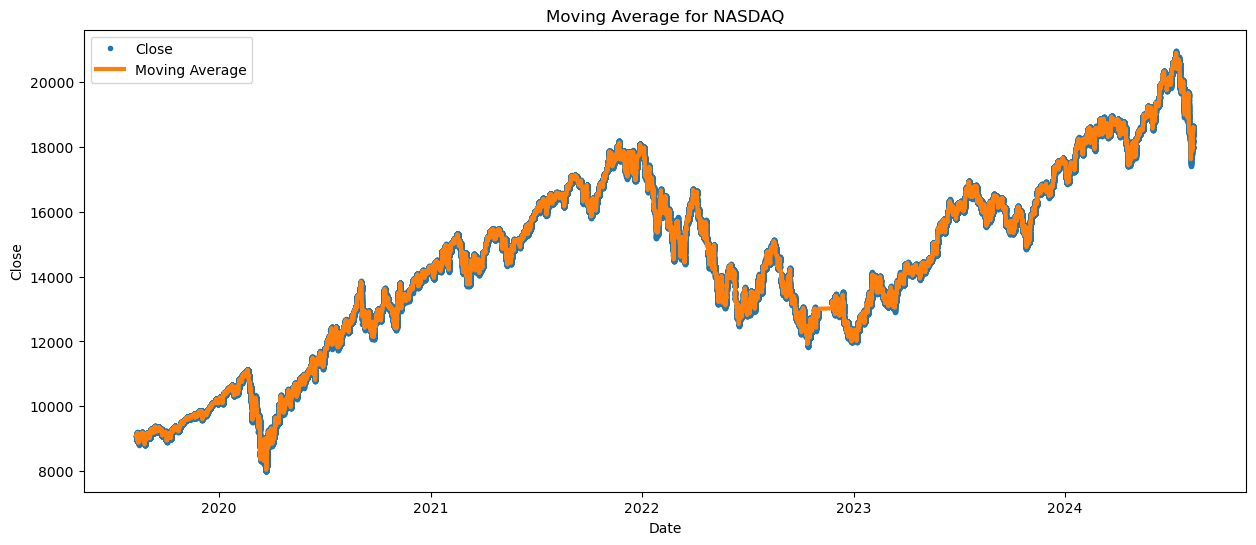

In [39]:
# Monthly Moving Average

moving_average(SP, 'Moving Average for S&P 500', "Set2", 30)
moving_average(NQ, 'Moving Average for NASDAQ', "tab10", 30)